# Code: Smart Beta Trading Strategy Based on Fundamental Factors

This is the code for our final project. In this project, we built our Smart Beta Trading Strategy based on fundamental factors. First let me show you how to run our code.

## How to run the code?

Our smart beta trading strategy is based on the Quantopian platform. To run our code, the first to use Quantopian platform: https://www.quantopian.com. Upload the 'code.ipynb' file in Quantopian-Research-Notebooks, and then you can run the code and get our results

## Code

In [16]:
import pandas as pd
import numpy as np
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.factset import Fundamentals
from quantopian.pipeline.factors import CustomFactor, Returns, Latest
from quantopian.pipeline.classifiers import Classifier
from quantopian.pipeline.filters import Q500US
from quantopian.research import run_pipeline
import matplotlib.pyplot as plt

class Momentum(CustomFactor):
    
    inputs = [Returns(window_length=10)]
    window_length = 10
    
    def compute(self, today, assets, out, lag_returns):
        out[:] = lag_returns[0]


def make_pipeline():
    # define our fundamental factor pipeline
    pipe = Pipeline()
    
    # market value,book_to_market,return_on_equity and reinvestment_rate data gets fed in here
    market_value = Latest([Fundamentals.mkt_val]) 
    book_to_market = 1/Latest([Fundamentals.pbk_af]) 
    return_on_equity=Latest([Fundamentals.roe_af]) 
    reinvestment_rate=Fundamentals.reinvest_rate_af.latest 
                             
    # and momentum as lagged returns 
    momentum = Momentum() 
    
    # we also get daily returns
    returns = Returns(window_length=2)
    
    # we compute a daily rank of all factors, this is used in the next step,
    # which is computing portfolio membership QTradableStocksUS
    market_value_rank = market_value.rank(mask=Q500US())
    book_to_market_rank = book_to_market.rank(mask=Q500US())
    return_on_equity_rank= return_on_equity.rank(mask=Q500US())
    reinvestment_rate_rank=reinvestment_rate.rank(mask=Q500US())
    momentum_rank = momentum.rank(mask=Q500US())
    
    # Grab the top and bottom 50 for each factor
    biggest = market_value_rank.top(50)
    smallest = market_value_rank.bottom(50)
    
    highpb = book_to_market_rank.top(50)
    lowpb = book_to_market_rank.bottom(50)
    
    robust = return_on_equity_rank.top(50)
    weak = return_on_equity_rank.bottom(50)
    
    conservative = reinvestment_rate_rank.top(50)
    aggressive = reinvestment_rate_rank.bottom(50)
    
    top = momentum_rank.top(50)
    bottom = momentum_rank.bottom(50)
    
    
    # Define our universe, screening out anything that isn't in the top or bottom 50 for each factor
    universe = Q500US() & (biggest | smallest | highpb | lowpb | top | bottom | robust |
                                     weak | conservative | aggressive)
    
    pipe = Pipeline(
        columns = {
            'market_value':market_value,
            'book_to_market':book_to_market,
            'return_on_equity':return_on_equity,
            'reinvestment_rate':reinvestment_rate,
            'momentum':momentum,
            'Returns':returns,
            'market_value_rank':market_value_rank,
            'book_to_market_rank':book_to_market_rank,
            'return_on_equity_rank':return_on_equity_rank,
            'reinvestment_rate_rank':reinvestment_rate_rank,
            'momentum_rank':momentum_rank,
            'biggest':biggest,
            'smallest':smallest,
            'highpb':highpb,
            'lowpb':lowpb,
            'top':top,
            'bottom':bottom,
            'robust':robust,
            'weak':weak,
            'conservative':conservative,
            'aggressive':aggressive
        },
        screen=universe
    )
    
    return pipe

# Initializing the pipe
pipe = make_pipeline()

# Now let's start the pipeline
start_date, end_date = '2018-01-01', '2018-12-30' 

results = run_pipeline(pipe, start_date, end_date)

results.head()

Returns aggressive biggest  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL]) -0.010347      False    True   
                          Equity(67 [ADSK]) -0.002094      False   False   
                          Equity(185 [AFL]) -0.004421      False   False   
                          Equity(216 [HES]) -0.018809       True   False   
                          Equity(239 [AIG]) -0.006668      False   False   

                                             book_to_market  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])        0.169669   
                          Equity(67 [ADSK])        0.040939   
                          Equity(185 [AFL])        0.725168   
                          Equity(216 [HES])        0.737110   
                          Equity(239 [AIG])        1.173749   

                                             book_to_market_rank bottom  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])                127.0  False   
                          Equity(67 [ADSK])                 25.0  False   
                          Equity(185 [AFL])                444.0  False   
                          Equity(216 [HES])                447.0   True   
                          Equity(239 [AIG])                485.0  False   

                                            conservative highpb  lowpb  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])        False  False  False   
                          Equity(67 [ADSK])        False  False   True   
                          Equity(185 [AFL])        False   True  False   
                          Equity(216 [HES])        False   True  False   
                          Equity(239 [AIG])        False   True  False   

                                             market_value  ...    momentum  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])  7.900500e+11  ...    0.023908   
                          Equity(67 [ADSK])  2.752450e+10  ...    0.004169   
                          Equity(185 [AFL])  3.205750e+10  ...    0.012708   
                          Equity(216 [HES])  1.489950e+10  ...   -0.062591   
                          Equity(239 [AIG])  5.518220e+10  ...    0.007564   

                                             momentum_rank  reinvestment_rate  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])          346.0          27.131180   
                          Equity(67 [ADSK])          240.0          10.630241   
                          Equity(185 [AFL])          286.0          10.479183   
                          Equity(216 [HES])           25.0         -38.461085   
                          Equity(239 [AIG])          262.0          -2.568120   

                                             reinvestment_rate_rank  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])                   432.0   
                          Equity(67 [ADSK])                   290.0   
                          Equity(185 [AFL])                   287.0   
                          Equity(216 [HES])                    33.0   
                          Equity(239 [AIG])                   113.0   

                                             return_on_equity  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])         36.867508   
                          Equity(67 [ADSK])        -49.473058   
                          Equity(185 [AFL])         13.925111   
                          Equity(216 [HES])        -36.155660   
                          Equity(239 [AIG])         -0.914689   

                                             return_on_equity_rank  robust  \
2018-01-02 00:00:00+00:00 Equity(24 [AAPL])                  430.0   False   
                          Equity(67 [ADSK])                   21.0   False   
                          Equity(185 [AFL])                  257.0   False   
                          Equity(216 [HES])                   26.0   False   
                          Equity(239 [AIG])                   85.0   False   

                                            smallest    top   weak  
20

In the next part we will use Research to explore Quantopian's datasets. Then, we will define our trading strategy and test the return of our strategy compared to the SPY based on historical data. 

2018-01-02 00:00:00+00:00   -0.005266
2018-01-03 00:00:00+00:00    0.015987
2018-01-04 00:00:00+00:00    0.004424
2018-01-05 00:00:00+00:00   -0.006786
2018-01-08 00:00:00+00:00   -0.007564
Freq: C, Name: Returns, dtype: float64

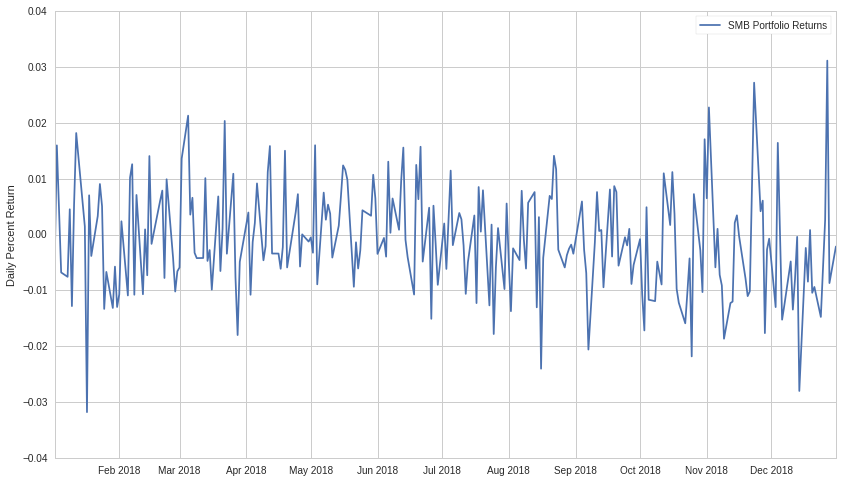

In [17]:
# group_by(level=0).mean() gives you the average return of each day for a particular group of stocks
R_biggest = results[results.biggest]['Returns'].groupby(level=0).mean()
R_smallest = results[results.smallest]['Returns'].groupby(level=0).mean()

R_highpb = results[results.highpb]['Returns'].groupby(level=0).mean()
R_lowpb = results[results.lowpb]['Returns'].groupby(level=0).mean()

R_robust = results[results.robust]['Returns'].groupby(level=0).mean()
R_weak = results[results.weak]['Returns'].groupby(level=0).mean()

R_conservative = results[results.conservative]['Returns'].groupby(level=0).mean()
R_aggressive = results[results.aggressive]['Returns'].groupby(level=0).mean()

R_top = results[results.top]['Returns'].groupby(level=0).mean()
R_bottom = results[results.bottom]['Returns'].groupby(level=0).mean()

# risk-free proxy
R_F = get_pricing('BIL', fields='price', start_date=start_date, end_date=end_date).pct_change()[1:]

# find it's beta against market
M = get_pricing('SPY', start_date=start_date, end_date=end_date, fields='price').pct_change()[1:]

# Defining our final factors
EXMRKT = M - R_F
SMB = R_smallest - R_biggest # small minus big
HML = R_highpb - R_lowpb # high minus low
RMW = R_robust - R_weak # robust minus weak
CMA = R_conservative - R_aggressive #conservative - aggressive
MOM = R_top - R_bottom # momentum

plt.plot(SMB.index, SMB.values)
plt.ylabel('Daily Percent Return')
plt.legend(['SMB Portfolio Returns']);
SMB.head()

2018-01-02 00:00:00+00:00   -0.002241
2018-01-03 00:00:00+00:00    0.007076
2018-01-04 00:00:00+00:00   -0.001756
2018-01-05 00:00:00+00:00    0.007322
2018-01-08 00:00:00+00:00   -0.006643
Freq: C, Name: Returns, dtype: float64

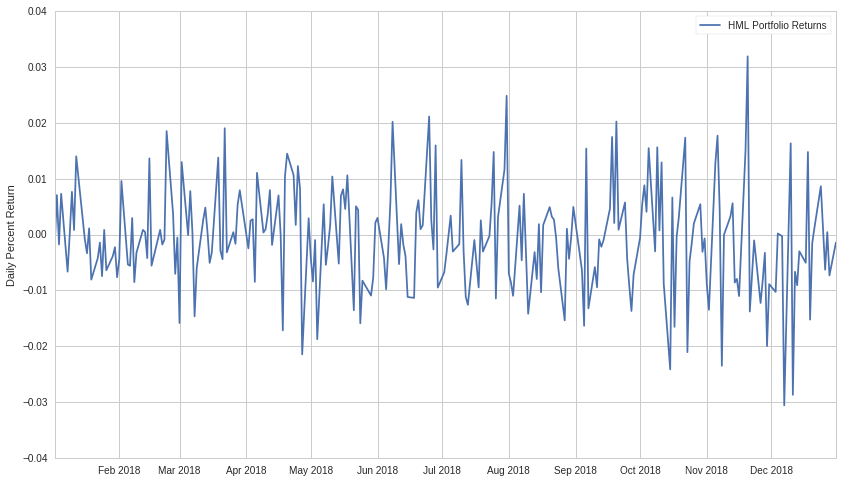

In [18]:
plt.plot(HML.index, HML.values)
plt.ylabel('Daily Percent Return')
plt.legend(['HML Portfolio Returns']);
HML.head()

2018-01-02 00:00:00+00:00    0.003904
2018-01-03 00:00:00+00:00   -0.017103
2018-01-04 00:00:00+00:00   -0.010280
2018-01-05 00:00:00+00:00   -0.004531
2018-01-08 00:00:00+00:00    0.006592
Freq: C, Name: Returns, dtype: float64

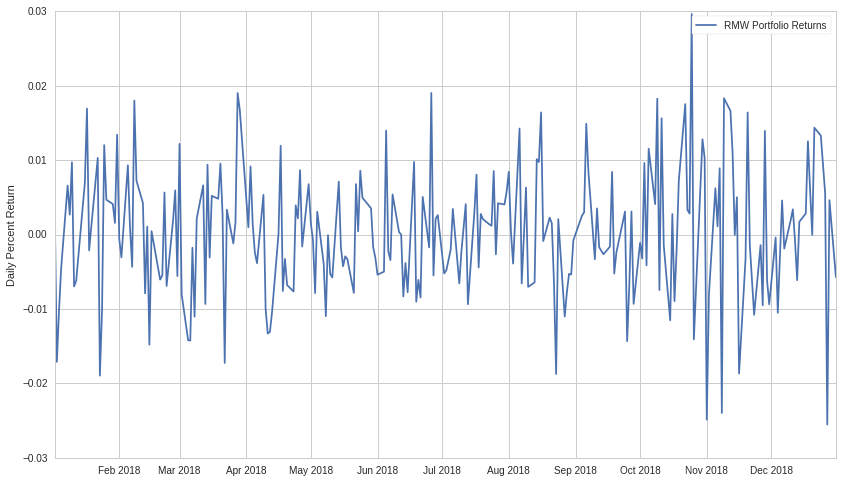

In [19]:
plt.plot(RMW.index, RMW.values)
plt.ylabel('Daily Percent Return')
plt.legend(['RMW Portfolio Returns']);
RMW.head()

2018-01-02 00:00:00+00:00    0.002487
2018-01-03 00:00:00+00:00   -0.006995
2018-01-04 00:00:00+00:00   -0.004156
2018-01-05 00:00:00+00:00    0.000724
2018-01-08 00:00:00+00:00    0.006515
Freq: C, Name: Returns, dtype: float64

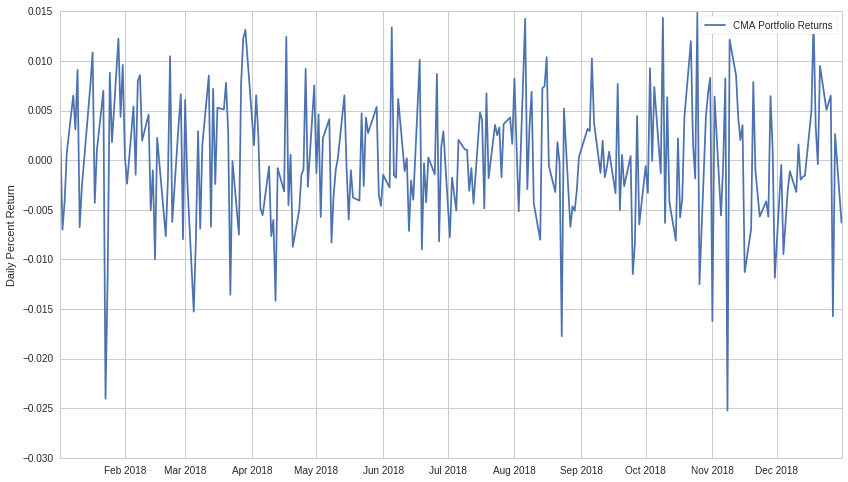

In [20]:
plt.plot(CMA.index, CMA.values)
plt.ylabel('Daily Percent Return')
plt.legend(['CMA Portfolio Returns']);
CMA.head()

2018-01-02 00:00:00+00:00    0.002487
2018-01-03 00:00:00+00:00   -0.006995
2018-01-04 00:00:00+00:00   -0.004156
2018-01-05 00:00:00+00:00    0.000724
2018-01-08 00:00:00+00:00    0.006515
Freq: C, Name: Returns, dtype: float64

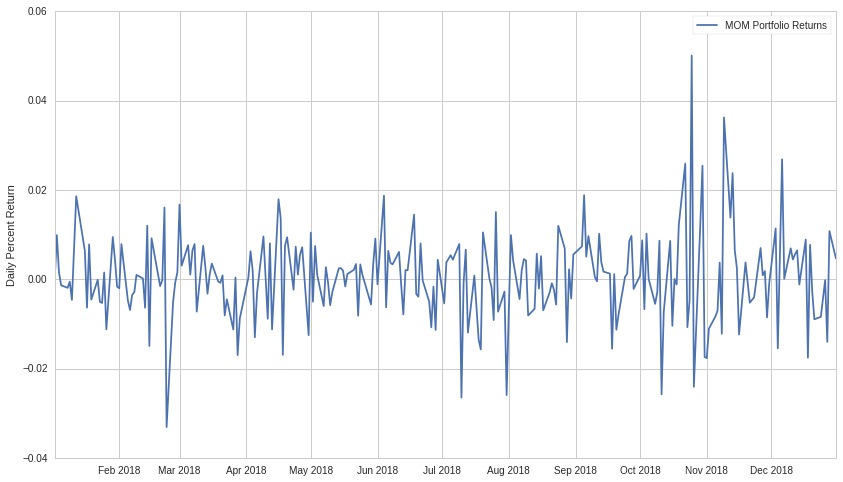

In [21]:
plt.plot(MOM.index, MOM.values)
plt.ylabel('Daily Percent Return')
plt.legend(['MOM Portfolio Returns']);
CMA.head()

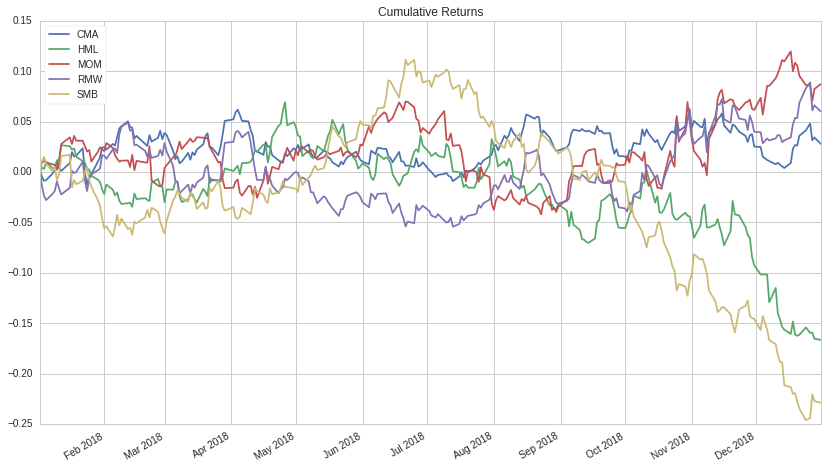

In [22]:
import empyrical as ep #calculate the cumulative return
cum_return_HML=ep.cum_returns(HML)
cum_return_SMB=ep.cum_returns(SMB)
cum_return_RMW=ep.cum_returns(RMW)
cum_return_CMA=ep.cum_returns(CMA)
cum_return_MOM=ep.cum_returns(MOM)
pd.DataFrame({   
    'HML': cum_return_HML,
    'SMB': cum_return_SMB,
    'RMW': cum_return_RMW,
    'CMA': cum_return_CMA,
    'MOM': cum_return_MOM,
}).plot(
    title='Cumulative Returns'
);

In [23]:
import pyfolio as pf
benchmark_rets = pf.utils.get_symbol_rets('SPY')
pf.plotting.show_perf_stats(MOM, benchmark_rets)

Start date,2018-01-02
End date,2018-12-31
Total months,11
,Backtest
Annual return,8.783%
Cumulative returns,8.746%
Annual volatility,15.641%
Sharpe ratio,0.62
Calmar ratio,0.84
Stability,0.10
Max drawdown,-10.464%


In [24]:
import itertools
import statsmodels.api as sm
from statsmodels import regression,stats
import scipy

data = results[['Returns']].set_index(results.index)
asset_list_sizes = [group[1].size for group in data.groupby(level=0)]

# Spreading the factor portfolio data across all assets for each day
SMB_column = [[SMB.loc[group[0]]] * size for group, size \
              in zip(data.groupby(level=0), asset_list_sizes)]
data['SMB'] = list(itertools.chain(*SMB_column))

HML_column = [[HML.loc[group[0]]] * size for group, size \
              in zip(data.groupby(level=0), asset_list_sizes)]
data['HML'] = list(itertools.chain(*HML_column))

MOM_column = [[MOM.loc[group[0]]] * size for group, size \
              in zip(data.groupby(level=0), asset_list_sizes)]
data['MOM'] = list(itertools.chain(*MOM_column))

CMA_column = [[CMA.loc[group[0]]] * size for group, size \
              in zip(data.groupby(level=0), asset_list_sizes)]
data['CMA'] = list(itertools.chain(*CMA_column))

RMW_column = [[RMW.loc[group[0]]] * size for group, size \
              in zip(data.groupby(level=0), asset_list_sizes)]
data['RMW'] = list(itertools.chain(*RMW_column))

EXMRKT_column = [[EXMRKT.loc[group[0]]]*size if group[0] in EXMRKT.index else [None]*size \
                 for group, size in zip(data.groupby(level=0), asset_list_sizes)]

data['EXMRKT'] = list(itertools.chain(*EXMRKT_column))

data = sm.add_constant(data.dropna())

# Our list of assets from pipeline
assets = data.index.levels[1].unique()

# gathering our data to be asset-specific
Y = [data.xs(asset, level=1)['Returns'] for asset in assets] 
X = [data.xs(asset, level=1)[['EXMRKT','SMB', 'HML', 'MOM','RMW','CMA', 'const']] for asset in assets]

# First regression step: estimating the betas
reg_results = [regression.linear_model.OLS(y, x).fit().params \
               for y, x in zip(Y, X) if not(x.empty or y.empty)]
indices = [asset for y, x, asset in zip(Y, X, assets) if not(x.empty or y.empty)]

betas = pd.DataFrame(reg_results, index=indices)
betas = sm.add_constant(betas.drop('const', axis=1))

R = data['Returns'].mean(axis=0, level=1)

# Second regression step: estimating the risk premia
risk_free_rate = np.mean(R_F)

final_results = regression.linear_model.OLS(R - risk_free_rate, betas).fit()

final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     6.987
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.50e-07
Time:                        15:15:52   Log-Likelihood:                 2625.3
No. Observations:                 572   AIC:                            -5237.
Df Residuals:                     565   BIC:                            -5206.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -8.07e-05      0.000     -0.526      0.599        -0.000     0.000
EXMRKT        -0.0003      0.000     -1.179      0.239        -0.001     0.000
SMB           -0.0005      0.000     -3.319      0.001        -0.001    -0.000
HML        -3.143e-05      0.000     -0.202      0.840        -0.000     0.000
MOM            0.0008      0.000      4.776      0.000         0.000     0.001
RMW            0.0005      0.000      3.454      0.001         0.000     0.001
CMA            0.0004      0.000      3.537      0.000         0.000     0.001
==============================================================================
Omnibus:                      105.450   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.952
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                      11.030   Cond. No.                         8.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#hedge
# we'll take a random sample of 200 assets from QTradableStocksUS in order to build a random portfolio
random_assets = list(np.random.choice(assets, size=200, replace=False))

portfolio_data = data[data.index.isin(random_assets, level=1)]

# this is the return of our portfolio with no hedging
R_portfolio_time_series = portfolio_data['Returns'].mean(level=0)

# next, we calculate the exposure of our portfolio to each of the Fama-French factors
portfolio_exposure = regression.linear_model.OLS(portfolio_data['Returns'], \
                                portfolio_data[['EXMRKT', 'SMB', 'HML', 'MOM','RMW','CMA','const']]).fit()

print portfolio_exposure.summary()

# our hedged return stream
hedged_portfolio = R_portfolio_time_series - \
                portfolio_exposure.params[0]*EXMRKT - \
                portfolio_exposure.params[1]*SMB - \
                portfolio_exposure.params[2]*HML - \
                portfolio_exposure.params[3]*RMW - \
                portfolio_exposure.params[4]*CMA - \
                portfolio_exposure.params[5]*MOM 

print 'Mean, Std of Hedged Portfolio:', np.mean(hedged_portfolio), np.std(hedged_portfolio)
print 'Mean, Std of Unhedged Portfolio:', np.mean(R_portfolio_time_series), np.std(R_portfolio_time_series)

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     396.0
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        15:15:52   Log-Likelihood:                 54501.
No. Observations:               22835   AIC:                        -1.090e+05
Df Residuals:                   22828   BIC:                        -1.089e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
EXMRKT        -0.0196      0.014     -1.408      0.1

In [26]:
# testing for normality: jarque-bera
_, pvalue_JB, _, _ = stats.stattools.jarque_bera(portfolio_exposure.resid)
print "Jarque-Bera p-value: ", pvalue_JB

# testing for homoskedasticity: breush pagan
_, pvalue_BP, _, _ = stats.diagnostic.het_breushpagan(portfolio_exposure.resid, \
                                            portfolio_data[['EXMRKT', 'SMB', 'HML', 'MOM','CMA','RMW','const']])
print "Breush Pagan p-value: ", pvalue_BP

# testing for autocorrelation
dw = stats.stattools.durbin_watson(portfolio_exposure.resid)
print "Durbin Watson statistic: ", dw

Jarque-Bera p-value:  0.0
Breush Pagan p-value:  0.0116048569218
Durbin Watson statistic:  1.65463567418


In [27]:
from quantopian.pipeline.filters import Q1500US

class Momentum(CustomFactor):
    
    inputs = [Returns(window_length=10)]
    window_length = 10
    
    def compute(self, today, assets, out, lag_returns):
        out[:] = lag_returns[0]

def make_pipeline():
    # define our fundamental factor pipeline
    pipe = Pipeline()
    
    return_on_equity=Latest([Fundamentals.roe_af]) 
    reinvestment_rate=Fundamentals.reinvest_rate_af.latest 
    momentum = Momentum() 

    
   #do standardization
    return_on_equity=return_on_equity.zscore()
    reinvestment_rate=reinvestment_rate.zscore()
    momentum=momentum.zscore()
    total_z= 0.34*return_on_equity+0.16*reinvestment_rate+0.5*momentum
    
    # we also get daily returns
    returns = Returns(window_length=2)
    
    # we compute a daily rank of both factors, this is used in the next step,
    # which is computing portfolio membership QTradableStocksUS
    total_z_rank = total_z.rank(mask=Q1500US())
    
    buy = total_z_rank.top(200)
    sell = total_z_rank.bottom(200)
    
    # Define our universe, screening out anything that isn't in the top or bottom 200
    universe = Q1500US() & (buy | sell)
    
    pipe = Pipeline(
        columns = {
            'total_z':total_z,
            'Returns':returns,
            'total_z_rank':total_z_rank,
            'buy':buy,
            'sell':sell    
        },
        screen=universe
    )
    
    return pipe

# Initializing the pipe
pipe = make_pipeline()

# Now let's start the pipeline
start_date, end_date = '2018-09-01', '2019-05-30' 

results = run_pipeline(pipe, start_date, end_date)

results.head()

Returns    buy   sell  \
2018-09-04 00:00:00+00:00 Equity(110 [RAMP])  0.003956   True  False   
                          Equity(168 [AET])   0.003308   True  False   
                          Equity(197 [AGCO]) -0.004338  False   True   
                          Equity(216 [HES])  -0.012029  False   True   
                          Equity(300 [ALK])   0.004614   True  False   

                                               total_z  total_z_rank  
2018-09-04 00:00:00+00:00 Equity(110 [RAMP])  0.254912        1328.0  
                          Equity(168 [AET])   0.236539        1306.0  
                          Equity(197 [AGCO]) -0.162957         177.0  
                          Equity(216 [HES])  -0.215176         123.0  
                          Equity(300 [ALK])   0.219956        1287.0

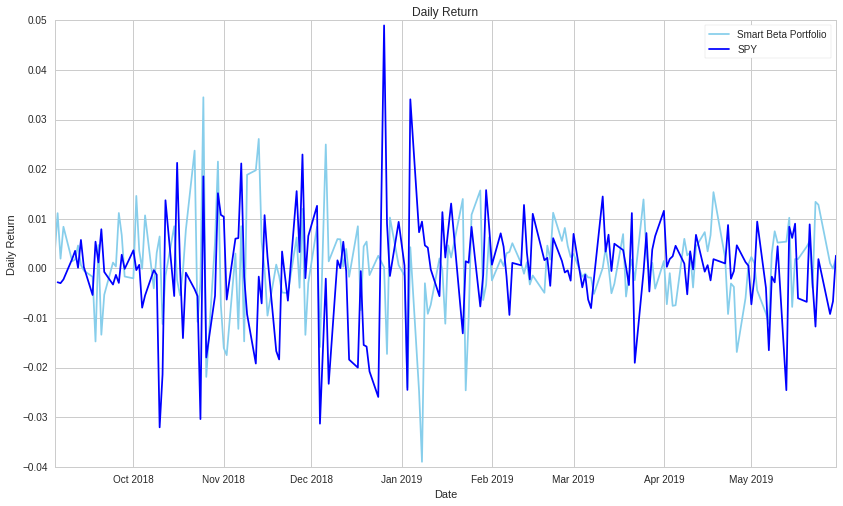

In [28]:
# group_by(level=0).mean() gives you the average return of each day for a particular group of stocks
R_buy = results[results.buy]['Returns'].groupby(level=0).mean()
R_sell = results[results.sell]['Returns'].groupby(level=0).mean()


# risk-free proxy
R_F = get_pricing('BIL', fields='price', start_date=start_date, end_date=end_date).pct_change()[1:]

# find it's beta against market
M = get_pricing('SPY', start_date=start_date, end_date=end_date, fields='price').pct_change()[1:]

# Defining our final factors
EXMRKT = M - R_F
T = R_buy -R_sell 


plt.title('Daily Return')
plt.plot(T,  color='skyblue', label='Smart Beta Portfolio')
plt.plot(M, color='blue', label='SPY')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

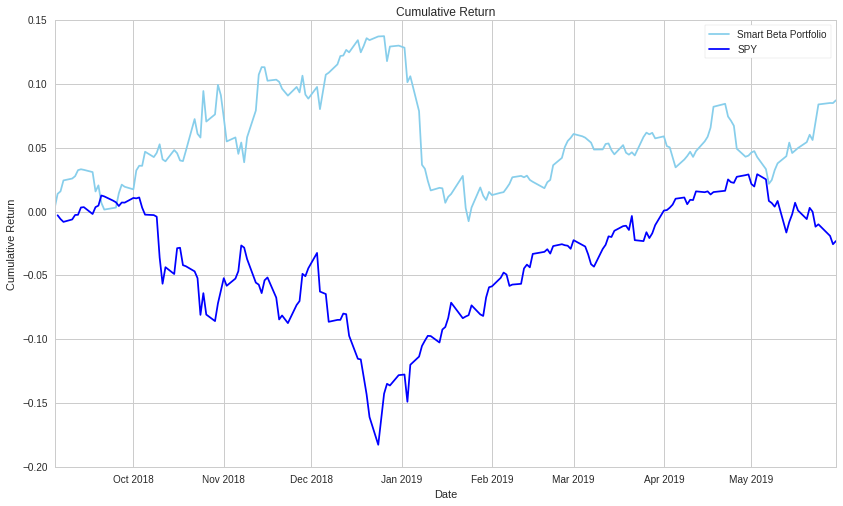

In [29]:
import empyrical as ep #cumulative return
cum_returns = ep.cum_returns(T)
cum_bmreturns = ep.cum_returns(M)


plt.title('Cumulative Return')
plt.plot(cum_returns,  color='skyblue', label='Smart Beta Portfolio')
plt.plot(cum_bmreturns, color='blue', label='SPY')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()